In [21]:
import sys
import glob
sys.path.append("../")
import CryoAsicAnalysis
import CryoAsicEventViewer
import CryoAsicFile

import matplotlib.pyplot as plt 
import numpy as np
plt.style.use("~/evanstyle.mplstyle")

In [2]:
datapath = "../../../data/cryo/test/"
datfiles = glob.glob(datapath+"*.dat")
h5files = glob.glob(datapath+"*.h5")

chmap_file = "../config/channel_map_template.txt"
tilemap_file = "../config/tile_map_template.txt"

In [18]:
#check if any dat files haven't been converted yet, and do so
#OR you can auto reload all files
reload_all = True
for df in datfiles:
    filetag = df.split("/")[-1]
    filetag = filetag.split(".")[0]
    found = False
    for hf in h5files:
        hfiletag = hf.split("/")[-1]
        hfiletag = hfiletag.split(".")[0]
        if(hfiletag == filetag):
            found = True
            break
    
    #if no h5 matching file was found, do the conversion
    if(found == False or reload_all):
        cf = CryoAsicFile.CryoAsicFile(df, chmap_file, tilemap_file)
        cf.load_raw_data(nevents=1000)
        cf.group_into_pandas()
        outfile_name = datapath+filetag+".h5"
        cf.save_to_hdf5(outfile_name)



Read 1000 events from CRYO ASIC file
Finished reading raw binary, now descrambling the data


descrambling event data:   0%|          | 0/1000 [00:00<?, ?it/s]

Done loading 1000 CRYO ASIC events


Adding waveforms to pandas dataframe:   0%|          | 0/1000 [00:00<?, ?it/s]

Saving dataframe to file: ../../../data/cryo/test/test.h5


/home/asicdaq/software/cryo-asic-analysis/notebooks/../CryoAsicFile.py:243: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Channels', 'Timestamp', 'Data', 'ChannelTypes', 'ChannelPositions',
       'Scope'],
      dtype='object')]

  self.waveform_df.to_hdf(outfile, key='raw')


# Quick plotter for some data file

In [8]:
datapath = "../../../data/cryo/test/"
datfiles = glob.glob(datapath+"*.dat")
h5files = glob.glob(datapath+"*.h5")
infile = h5files[0]

#key_channel : this channel is disabled, very specific purpose to look for misalignment issues
#dead_channels : marked for analysis purposes
#baseline : used for calculating baseline calibrations, noise calculations, etc. 
config = { 
    "baseline":[10, 20],
    "sampling_rate":1, 
    "pulse_threshold": 100, 
    "mv_per_adc": 1800./4096, 
    "key_channel": None, 
    "dead_channels": []
}
cv = CryoAsicEventViewer.CryoAsicEventViewer(infile, config)
cv.baseline_subtract()

loading hdf5 file ../../../data/cryo/test/test.h5
Done loading


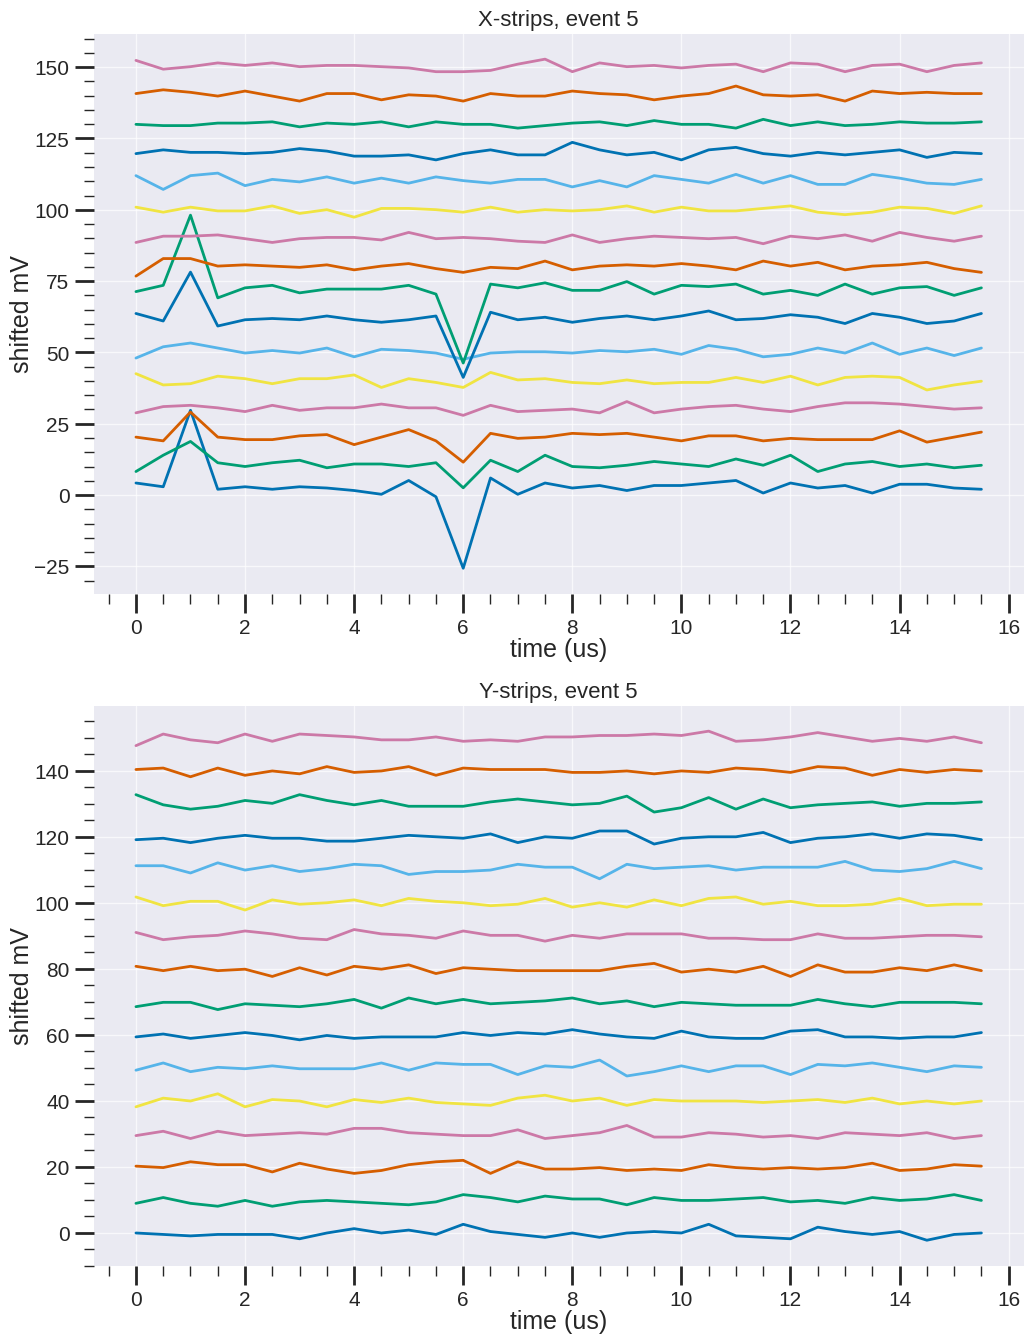

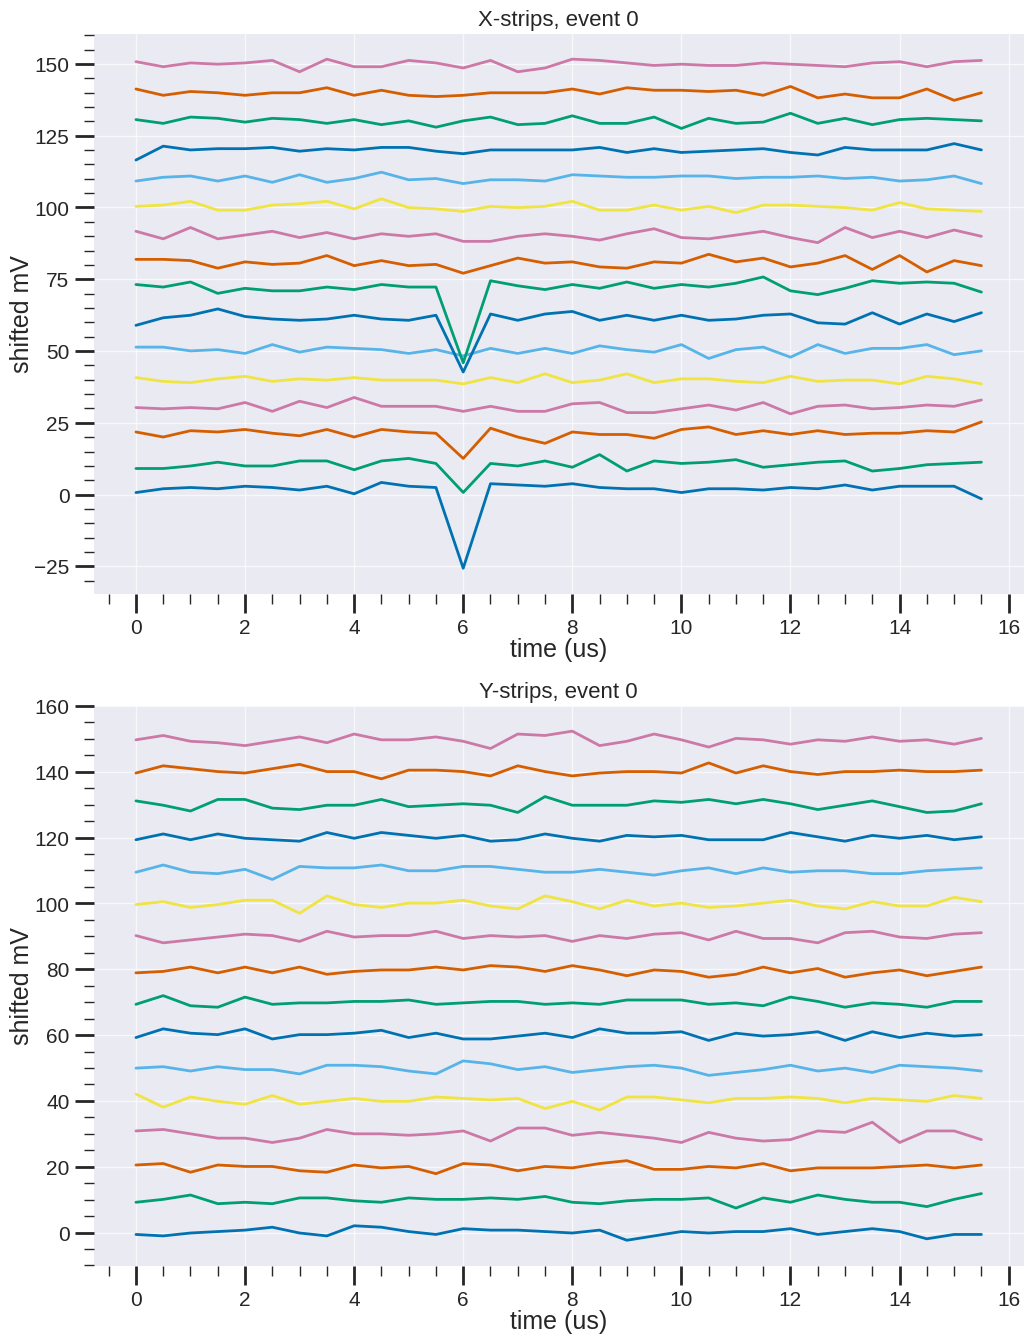

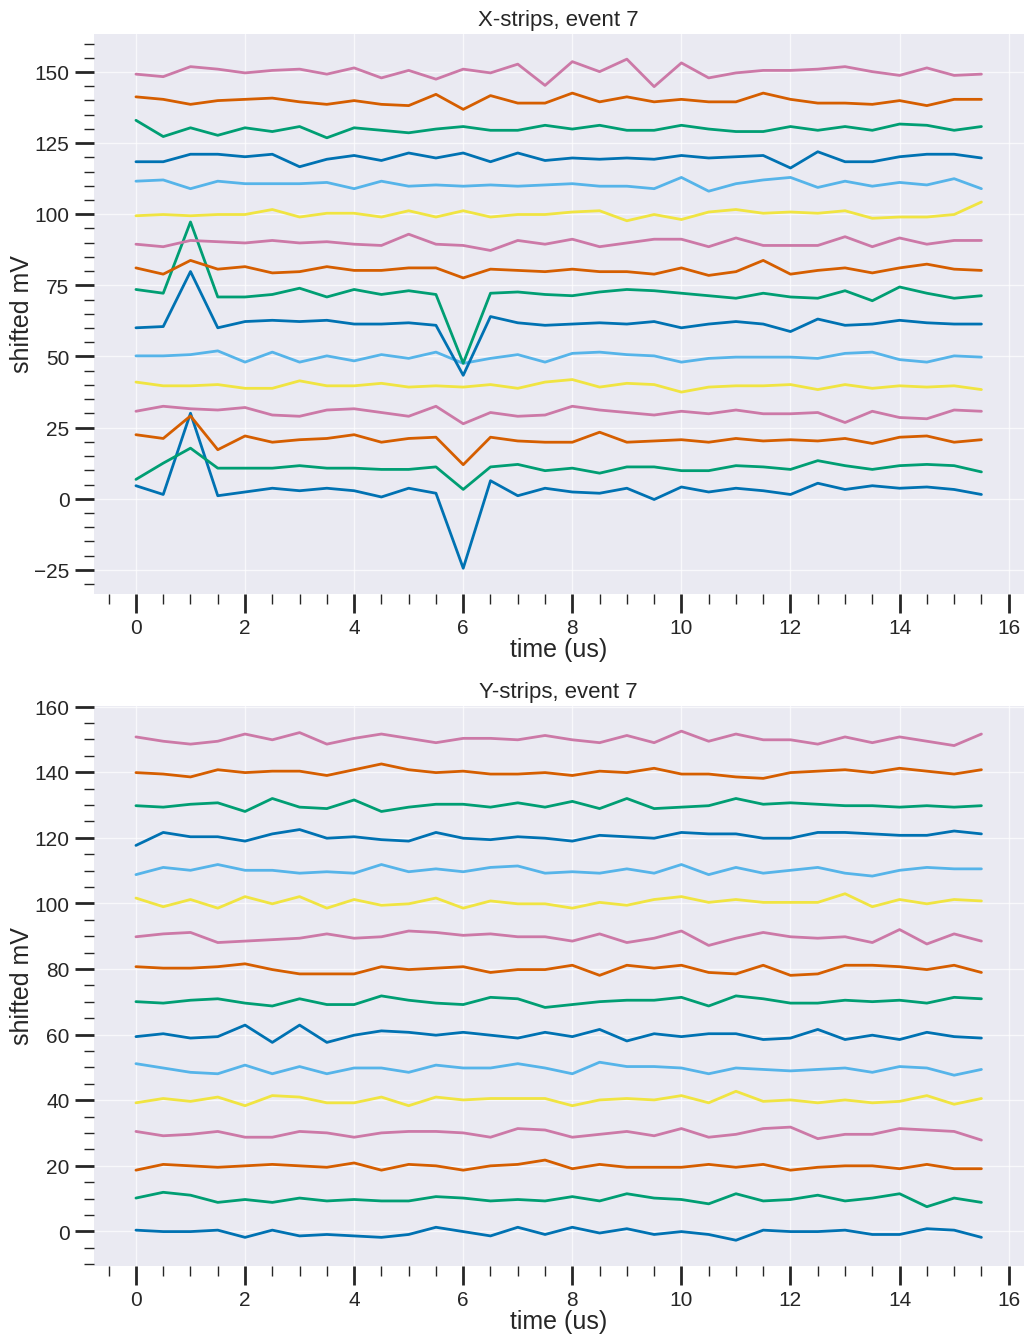

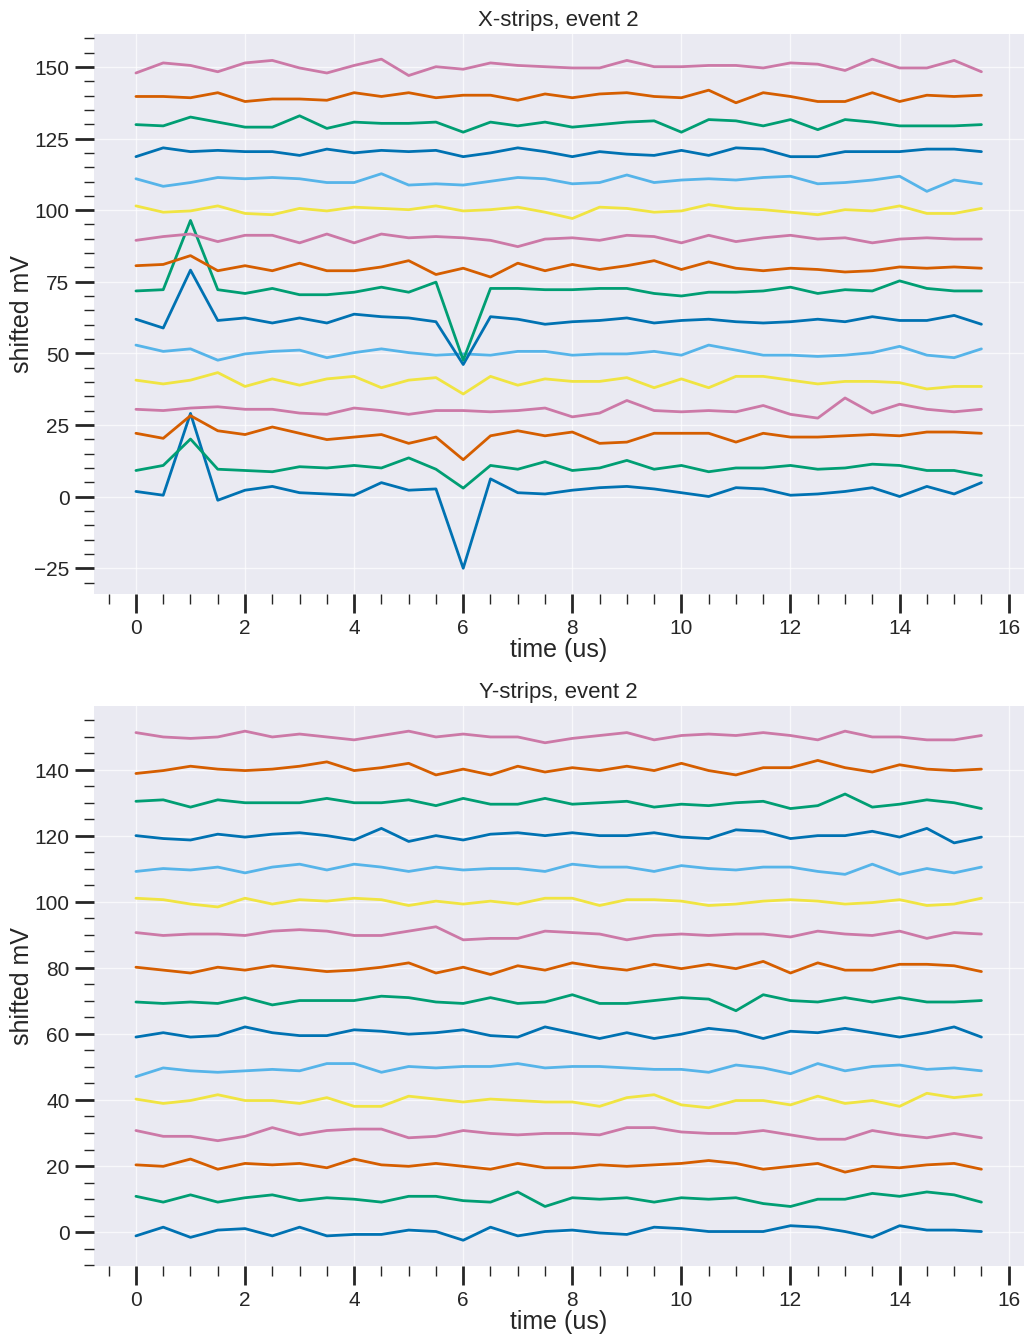

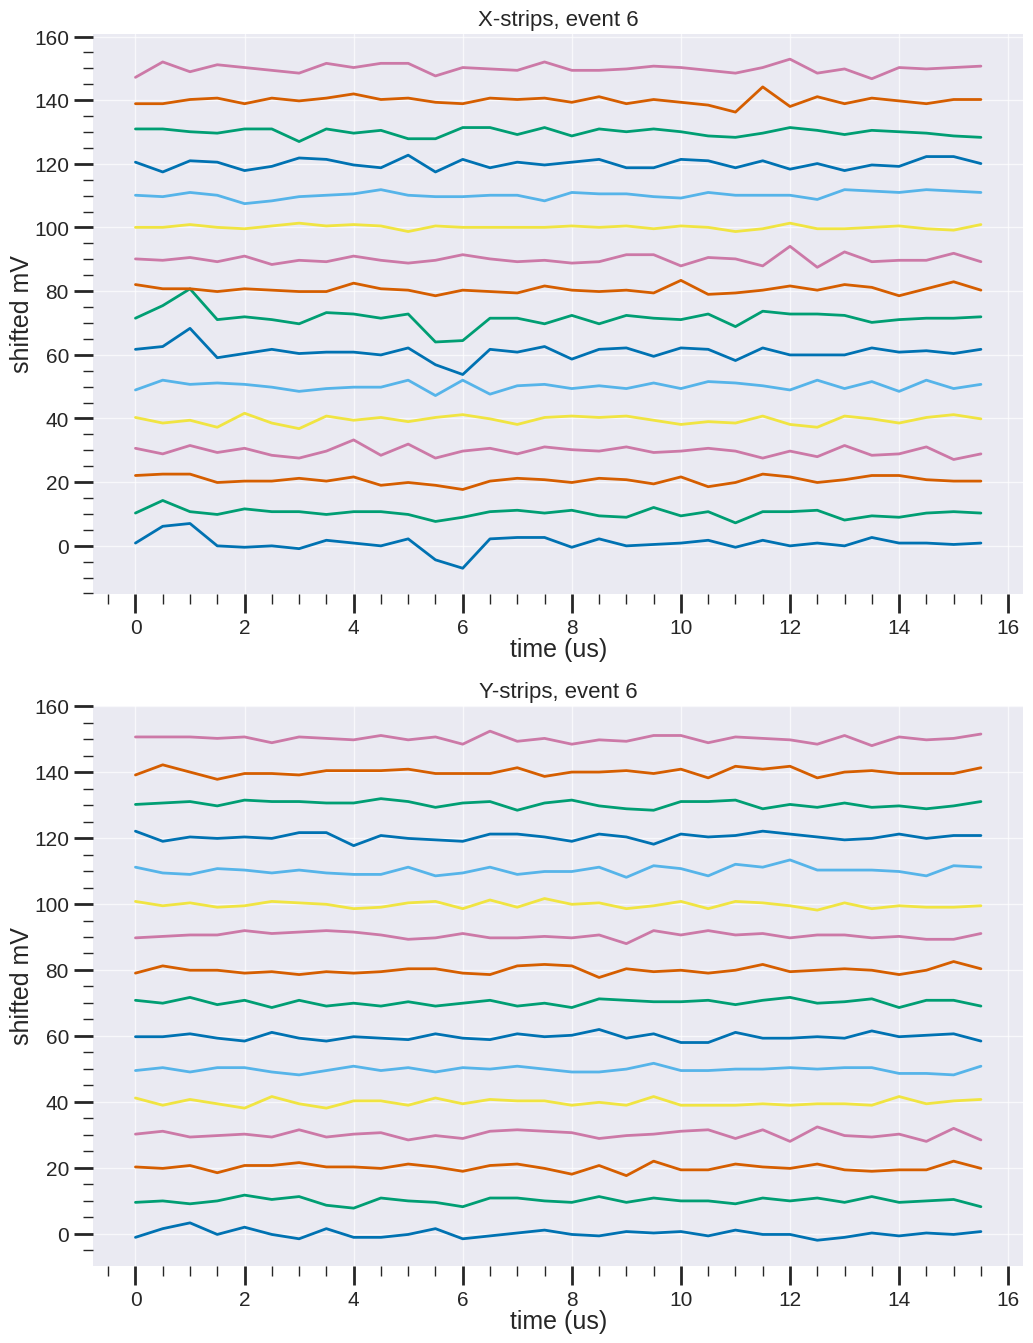

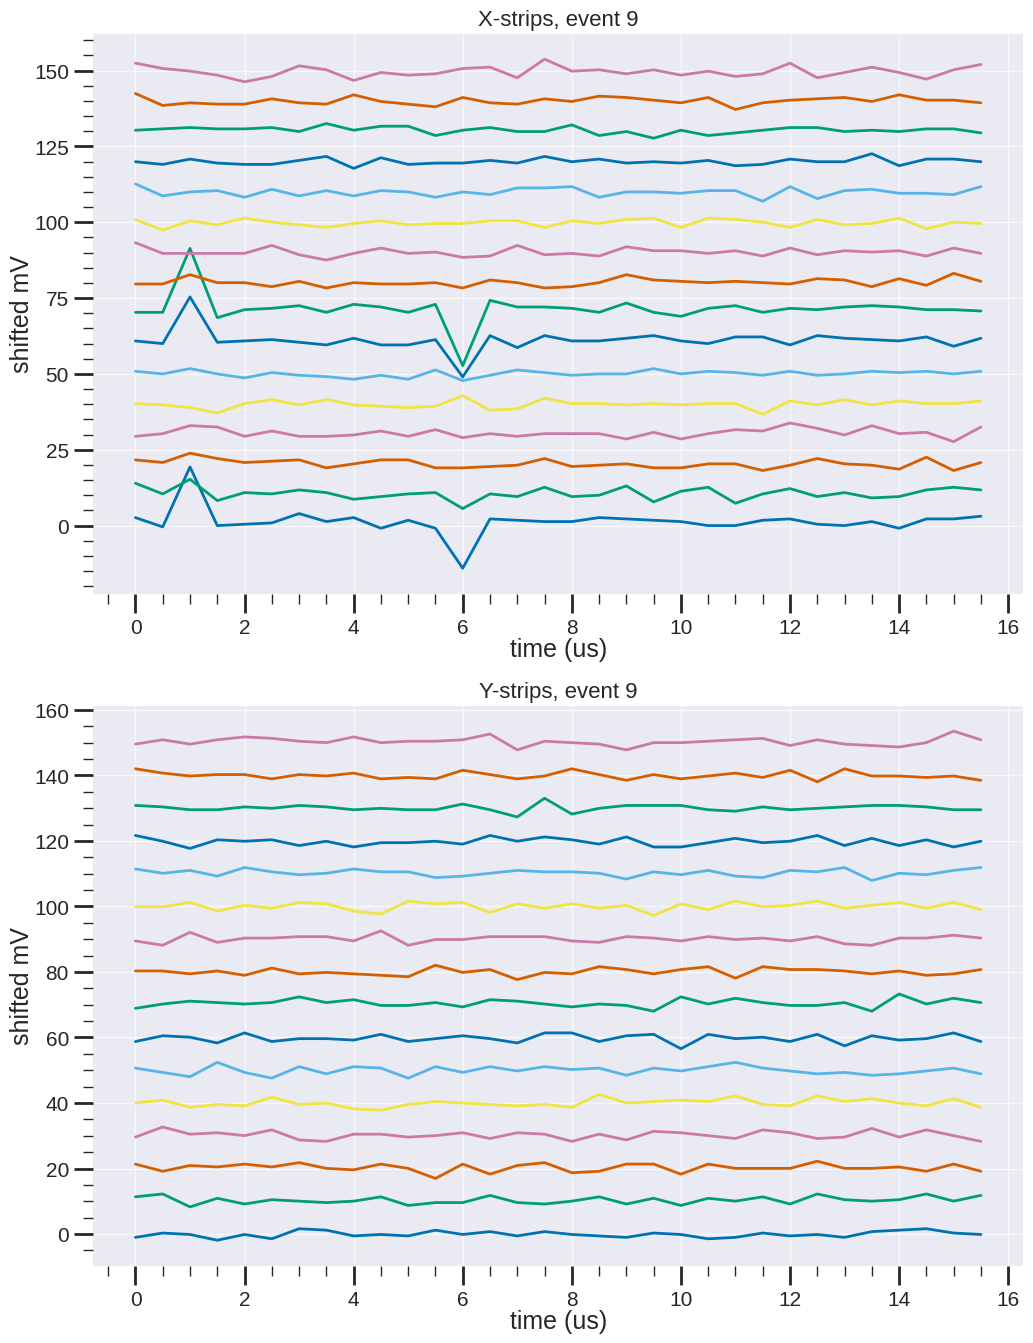

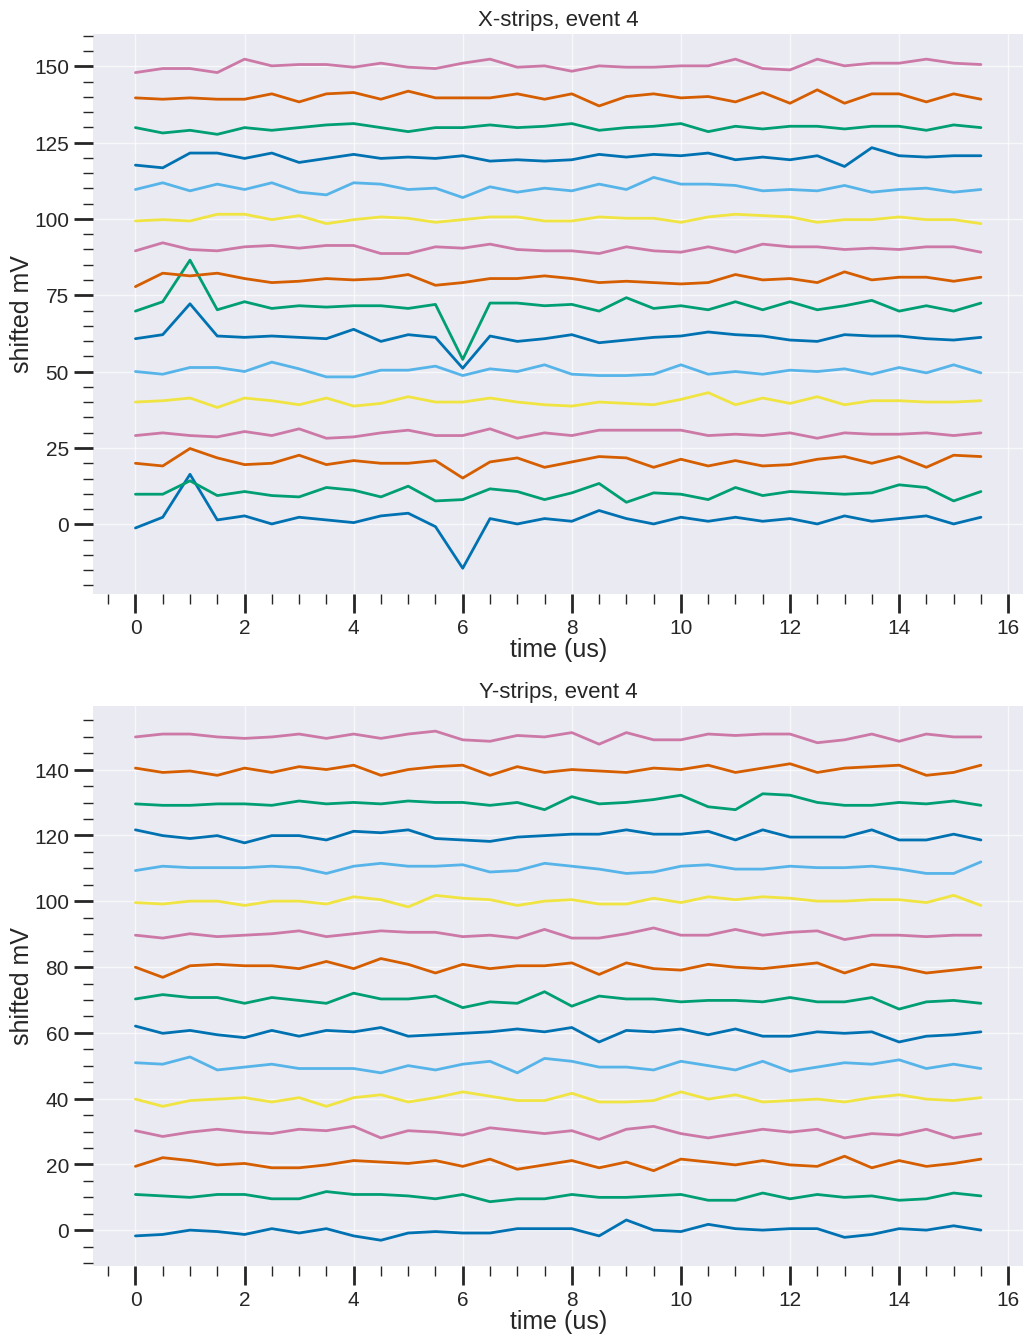

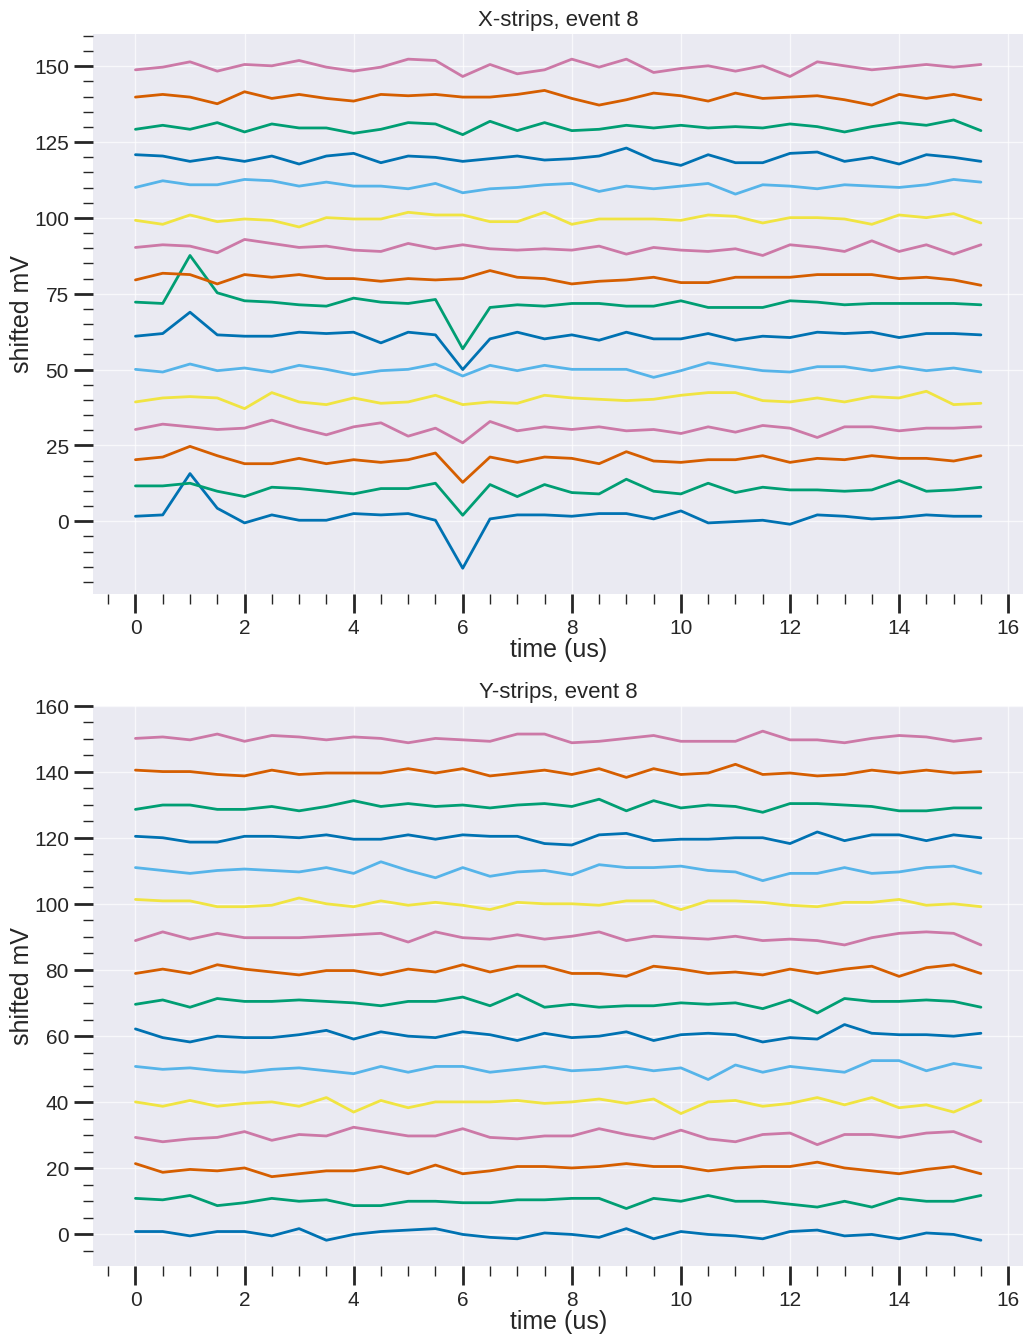

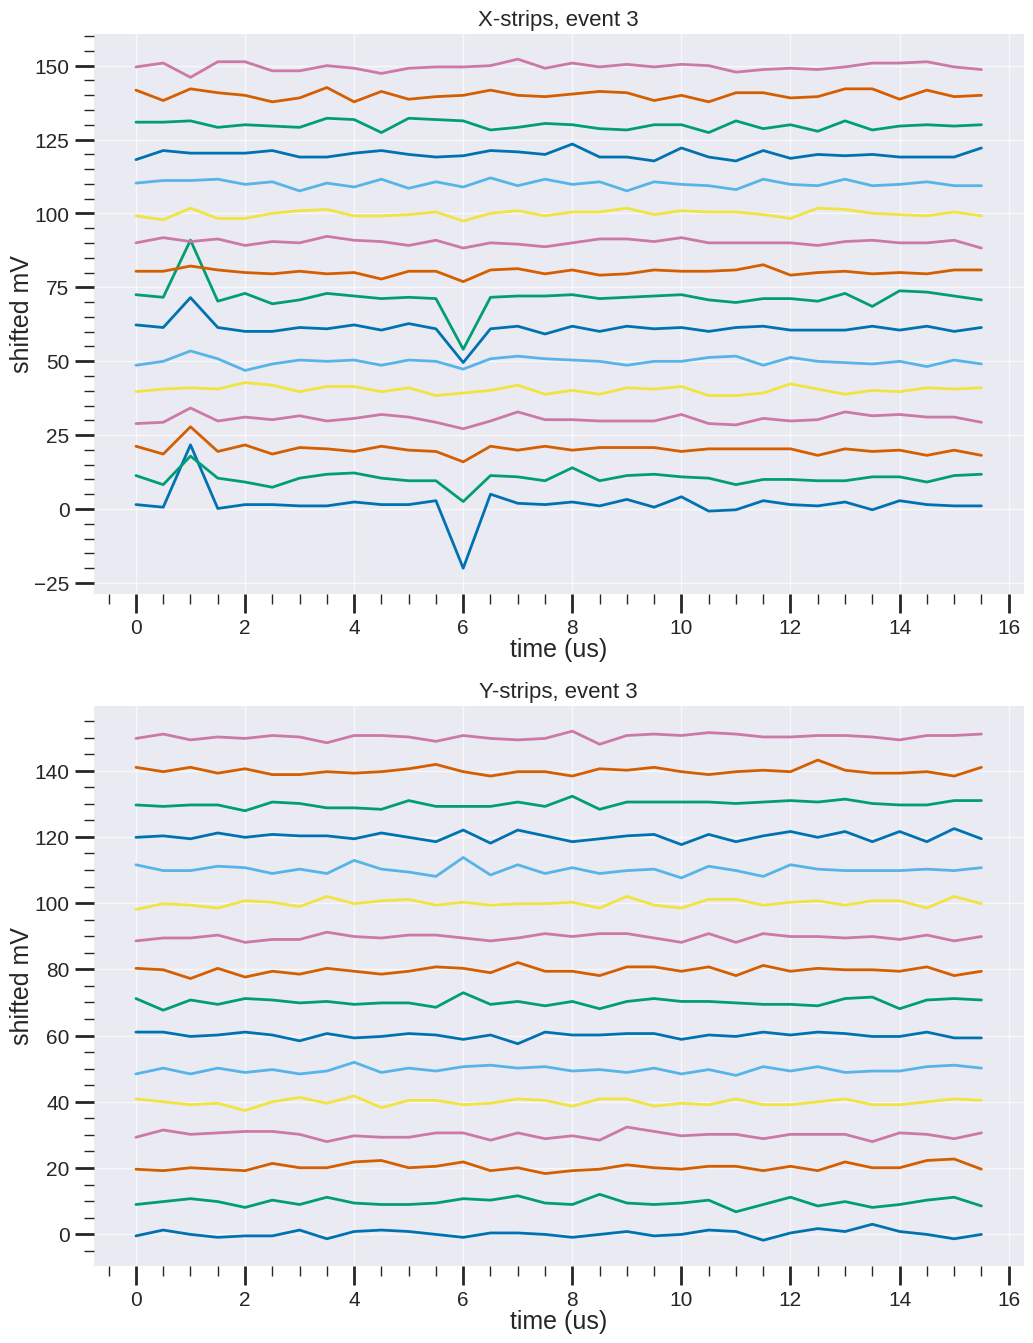

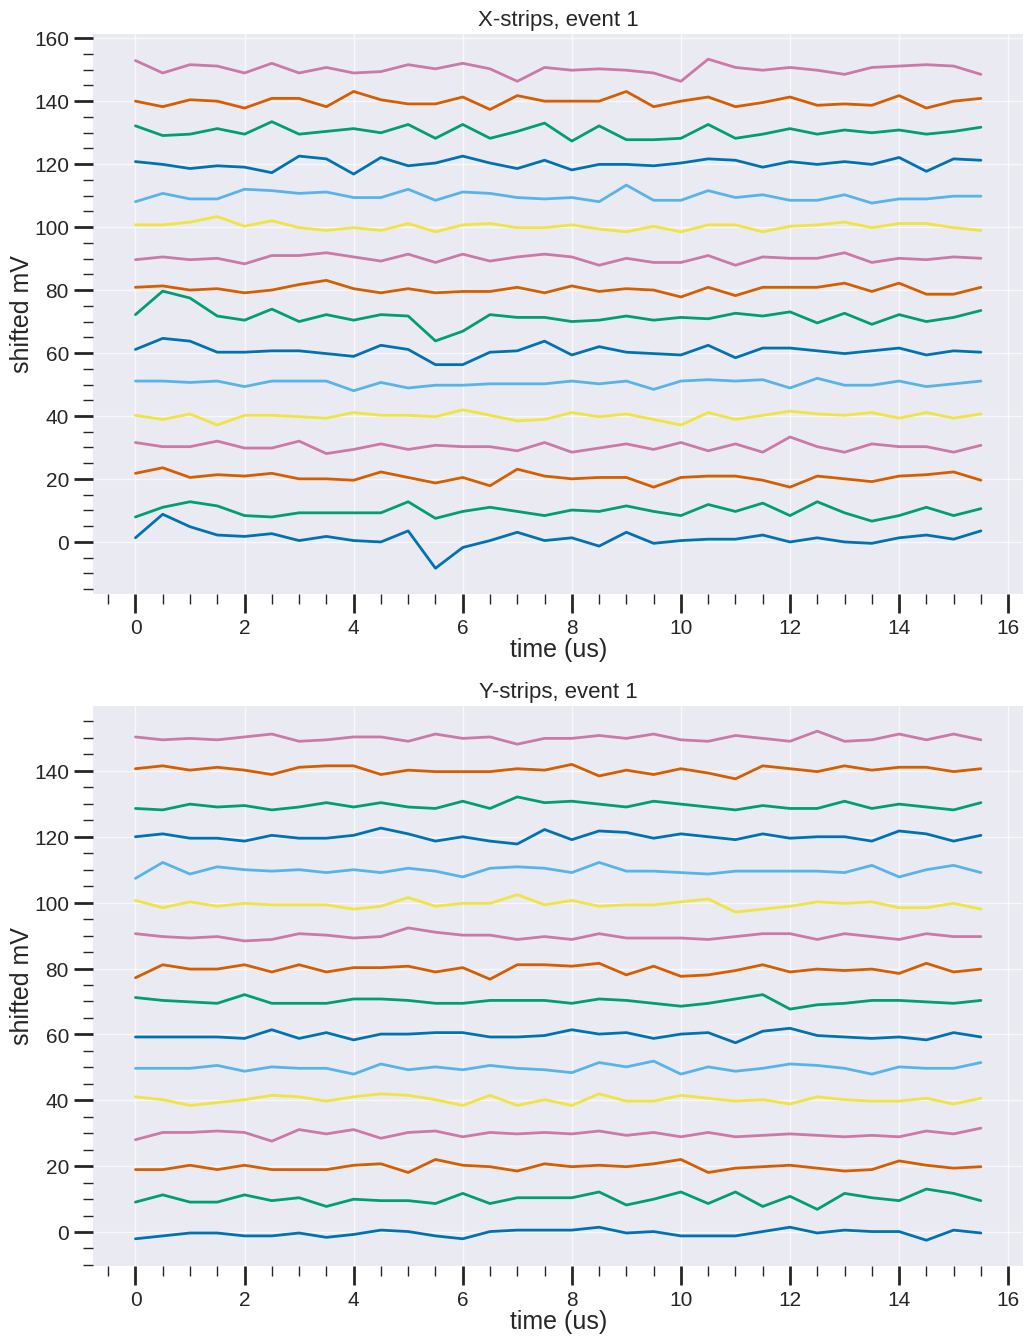

In [22]:
#plot random events
nevts = 10
max_n = cv.nevents_total
evts_to_plot = np.random.choice(range(max_n), nevts, replace=False) #no repeat events
for i in evts_to_plot:
    cv.plot_strips_waveforms_separated(i)